In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import konlpy
okt = Okt()

In [2]:
import pandas as pd

c = pd.read_csv("C:/PYTHON/G_ML/해커톤/kakao_2206.csv")

c

,전체날짜,종목명,제목,본문
0,2022.06.01 05:23,카카오,이시간에 카카오메인이 조선이 싹쓸이하네...,메인 7개 뉴스중에 5개가 조선1개가 동아 1개가 듣보잡 인터넷언론....이러니 주...
1,2022.06.01 08:44,카카오,돈은 많이 받으면서,근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 tv보면서 근무하고...
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^,"토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다.\n""범수 똘마니 의심 ""\n""..."
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나,김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지\n\n카...
4,2022.06.01 09:37,카카오,한오백년 전쟁하자는 미필 양키괴뢰!!!,"우리는 원래 하나였으나, 미,소에 의해 강제로 분단 당했습니다.\n피눈물도 없다는 ..."
...,...,...,...,...
6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면,https://youtu.be/C2-HTUyE6Y4\n\n당신은 천재ㅋㅋㅋ 왕따 아...
6616,2022.06.30 23:34,카카오,잠이 안온다,내일 인버스에 얼마나 꽂힐지..돈복사
6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요,궁금합니다
6618,2022.06.30 23:52,카카오,나스닥 7천,간다.\n\n카카오는 3만 간다.\n\nㅋㅋ


In [3]:
c['제목+본문'] = c['제목'] + c['본문']
c

,전체날짜,종목명,제목,본문,제목+본문
0,2022.06.01 05:23,카카오,이시간에 카카오메인이 조선이 싹쓸이하네...,메인 7개 뉴스중에 5개가 조선1개가 동아 1개가 듣보잡 인터넷언론....이러니 주...,이시간에 카카오메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가 동...
1,2022.06.01 08:44,카카오,돈은 많이 받으면서,근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 tv보면서 근무하고...,돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^,"토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다.\n""범수 똘마니 의심 ""\n""...",유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나,김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지\n\n카...,빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4,2022.06.01 09:37,카카오,한오백년 전쟁하자는 미필 양키괴뢰!!!,"우리는 원래 하나였으나, 미,소에 의해 강제로 분단 당했습니다.\n피눈물도 없다는 ...","한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로..."
...,...,...,...,...,...
6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면,https://youtu.be/C2-HTUyE6Y4\n\n당신은 천재ㅋㅋㅋ 왕따 아...,이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...
6616,2022.06.30 23:34,카카오,잠이 안온다,내일 인버스에 얼마나 꽂힐지..돈복사,잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사
6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요,궁금합니다,이거 액분전에 평균얼마엿어요궁금합니다
6618,2022.06.30 23:52,카카오,나스닥 7천,간다.\n\n카카오는 3만 간다.\n\nㅋㅋ,나스닥 7천간다.\n\n카카오는 3만 간다.\n\nㅋㅋ


In [8]:
c['제목+본문']

0       이시간에 카카오메인이 조선이 싹쓸이하네...메인 7개 뉴스중에 5개가 조선1개가 동...
1       돈은 많이 받으면서근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 ...
2       유영두 할아버지 넘 실망이에요~~^^토른방에 남겨진 유영두 할아버지에 대한 댓글 입...
3       빡빡이 하는짓 보면 모르나김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 ...
4       한오백년 전쟁하자는 미필 양키괴뢰!!!우리는 원래 하나였으나, 미,소에 의해 강제로...
                              ...                        
6615    이거보고 윤석열이 왕따라고 생각하면https://youtu.be/C2-HTUyE6Y...
6616                           잠이 안온다내일 인버스에 얼마나 꽂힐지..돈복사
6617                                 이거 액분전에 평균얼마엿어요궁금합니다
6618                       나스닥 7천간다.\n\n카카오는 3만 간다.\n\nㅋㅋ
6619                카카오 계열사이 쉐리들은 왜 배당을 안줌? 생각할수록 아주 괘씸하네
Name: 제목+본문, Length: 6620, dtype: object

In [5]:
print(len(c['본문'])) # 리뷰 개수 출력


6620


In [6]:
print(c['본문'].isnull().values.any())


False


In [7]:
train_data = c['본문'].dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
train_data

False


0       메인 7개 뉴스중에 5개가 조선1개가 동아 1개가 듣보잡 인터넷언론....이러니 주...
1       근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 tv보면서 근무하고...
2       토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다.\n"범수 똘마니 의심 "\n"...
3       김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지\n\n카...
4       우리는 원래 하나였으나, 미,소에 의해 강제로 분단 당했습니다.\n피눈물도 없다는 ...
                              ...                        
6615    https://youtu.be/C2-HTUyE6Y4\n\n당신은 천재ㅋㅋㅋ 왕따 아...
6616                                 내일 인버스에 얼마나 꽂힐지..돈복사
6617                                                궁금합니다
6618                             간다.\n\n카카오는 3만 간다.\n\nㅋㅋ
6619                       이 쉐리들은 왜 배당을 안줌? 생각할수록 아주 괘씸하네
Name: 본문, Length: 6620, dtype: object

In [8]:

train_data = train_data.astype(str)
                                                                                                    
train_data


0       메인 7개 뉴스중에 5개가 조선1개가 동아 1개가 듣보잡 인터넷언론....이러니 주...
1       근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 tv보면서 근무하고...
2       토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다.\n"범수 똘마니 의심 "\n"...
3       김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지\n\n카...
4       우리는 원래 하나였으나, 미,소에 의해 강제로 분단 당했습니다.\n피눈물도 없다는 ...
                              ...                        
6615    https://youtu.be/C2-HTUyE6Y4\n\n당신은 천재ㅋㅋㅋ 왕따 아...
6616                                 내일 인버스에 얼마나 꽂힐지..돈복사
6617                                                궁금합니다
6618                             간다.\n\n카카오는 3만 간다.\n\nㅋㅋ
6619                       이 쉐리들은 왜 배당을 안줌? 생각할수록 아주 괘씸하네
Name: 본문, Length: 6620, dtype: object

In [9]:
train_data = train_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-9-20cf00234ab8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data = train_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [10]:
train_data[:5] # 상위 5개 출력


0       메인 개 뉴스중에 개가 조선개가 동아 개가 듣보잡 인터넷언론이러니 주가가 이모양이지
1    근무시간에 오디오라인 열어놓는게 불만이라니그냥 집에서 누워서 보면서 근무하고 싶나보...
2    토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다범수 똘마니 의심 생긴것이 사기꾼...
3    김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지카카오 대...
4    우리는 원래 하나였으나 미소에 의해 강제로 분단 당했습니다피눈물도 없다는 유태계 양...
Name: 본문, dtype: object

In [21]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 한국어 약식 불용어 사전 다운로드
# - https://www.ranks.nl/stopwords/korean
# - 텍스트 파일로 저장

korean_stopwors_path = "C:/PYTHON/G_ML/해커톤/korean_stopword.txt"

# 불용어 텍스트 파일 오픈
with open (korean_stopwors_path, encoding= 'utf8') as f : 
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in (train_data):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    
    t_s = []
    for i in range(len(tokenized_sentence)):
        if len(tokenized_sentence[i]) > 1:
            t_s.append(tokenized_sentence[i])
        
    stopwords_removed_sentence = [word for word in t_s if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

In [22]:
tokenized_data

[['메인', '뉴스', '조선', '동아', '듣보잡', '인터넷', '언론', '이러니', '주가', '모양', '이지'],
 ['근무시간',
  '오디오',
  '라인',
  '열다',
  '불만',
  '이라니',
  '그냥',
  '눕다',
  '보다',
  '근무',
  '하고',
  '싶다',
  '그냥',
  '출근',
  '주가',
  '반토막',
  '나다',
  '성과급',
  '이랑',
  '월급',
  '인상',
  '하다',
  '꼬박꼬박',
  '받다',
  '불만',
  '졸라',
  '많다'],
 ['토른방',
  '남겨지다',
  '유영',
  '할아버지',
  '대한',
  '댓글',
  '이다',
  '범수',
  '똘마',
  '의심',
  '생기다',
  '사기꾼',
  '방송',
  '보다',
  '사기꾼',
  '인지',
  '모르다',
  '주식',
  '접다',
  '이렇다',
  '댓글',
  '보다',
  '할아버지',
  '너무',
  '실망',
  '크다',
  '할아버지',
  '이렇다',
  '댓글',
  '증말',
  '사실',
  '아니다',
  '할아버지',
  '믿다'],
 ['김범수',
  '일구다',
  '내다',
  '자리',
  '편하다',
  '앉다',
  '메타',
  '버스',
  '빌다',
  '미로',
  '날로',
  '먹다',
  '하다',
  '카카오',
  '대표',
  '빡빡이',
  '바뀌다',
  '직원',
  '불리다',
  '하다',
  '개선',
  '되다',
  '하다'],
 ['원래',
  '이다',
  '미소',
  '의하다',
  '강제',
  '분단',
  '당하다',
  '눈물',
  '없다',
  '유태계',
  '양키',
  '군산',
  '복합',
  '체놈',
  '천문학',
  '재고',
  '무기',
  '진용',
  '핏줄',
  '학살',
  '비운',
  '슬프다',
  '민족',
  '이다',
  '양키',
  '점령',
  '치하',

리뷰의 최대 길이 : 686
리뷰의 평균 길이 : 14.8892749244713


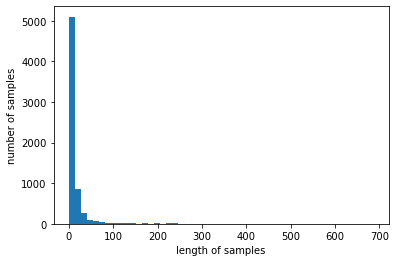

In [23]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [25]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(3049, 100)

In [26]:
#print(model.wv.most_similar("카카오"))
sw = model.wv.most_similar("카카오")
sw

[('페이', 0.9980905652046204),
 ('게임', 0.9980506300926208),
 ('네이버', 0.9978529810905457),
 ('뱅크', 0.9977385997772217),
 ('모빌리티', 0.9973039627075195),
 ('현대차', 0.9965713620185852),
 ('매각', 0.9963140487670898),
 ('잡다', 0.9963029026985168),
 ('짜다', 0.9962081909179688),
 ('지주사', 0.9961782693862915)]

In [27]:
model.wv.most_similar("김범수")


[('플랫폼', 0.9996172189712524),
 ('서비스', 0.9996135830879211),
 ('관련', 0.9996092319488525),
 ('직원', 0.9995847344398499),
 ('현재', 0.9995740652084351),
 ('늘다', 0.999571681022644),
 ('들이다', 0.9995707273483276),
 ('에도', 0.9995700120925903),
 ('이라고', 0.9995681643486023),
 ('문재인', 0.9995646476745605)]

In [28]:
# 단어 벡터를 구한다.
word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4